In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn import metrics

import warnings
warnings.filterwarnings('ignore')

# Load the dataset
df = pd.read_csv('bitcoin.csv')
print(df.head())
print(df.shape)
print(df.describe())
print(df.info())


         unix                 date   symbol      open      high       low  \
0  1514764740  2017-12-31 23:59:00  BTC/USD  13913.28  13913.28  13867.18   
1  1514764680  2017-12-31 23:58:00  BTC/USD  13913.26  13953.83  13884.69   
2  1514764620  2017-12-31 23:57:00  BTC/USD  13908.73  13913.26  13874.99   
3  1514764560  2017-12-31 23:56:00  BTC/USD  13827.00  13908.69  13827.00   
4  1514764500  2017-12-31 23:55:00  BTC/USD  13825.05  13825.05  13825.05   

      close  Volume BTC    Volume USD  
0  13880.00    0.591748   8213.456549  
1  13953.77    1.398784  19518.309658  
2  13913.26    0.775012  10782.944294  
3  13859.58    0.666459   9236.841134  
4  13825.05    0.065501    905.560130  
(525599, 9)
               unix           open           high            low  \
count  5.255990e+05  525599.000000  525599.000000  525599.000000   
mean   1.498997e+09    3948.408377    3952.208189    3943.751886   
std    9.103650e+06    3936.757966    3942.382649    3929.589942   
min    1.4832

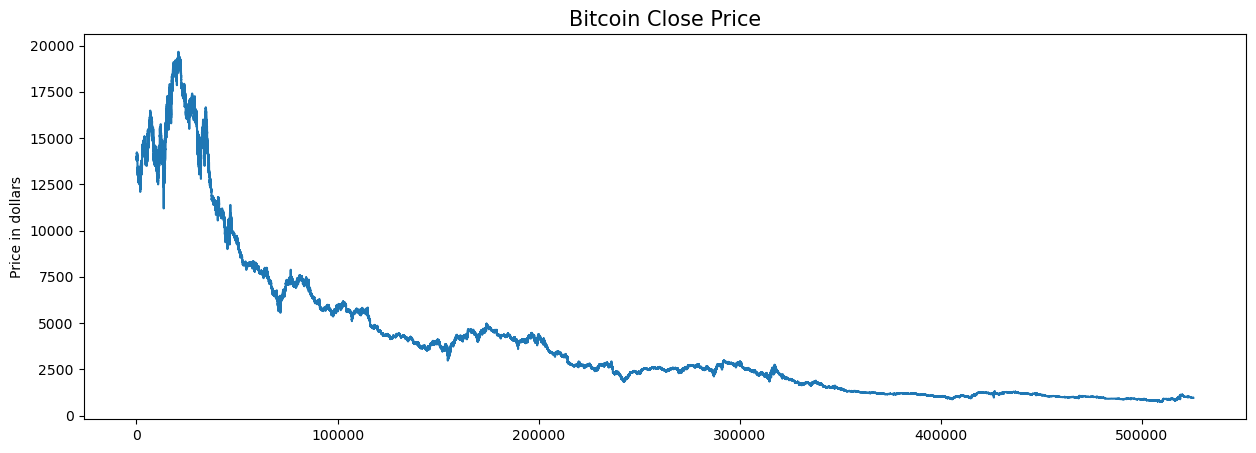

In [3]:
# Plotting the 'close' prices
plt.figure(figsize=(15, 5))
plt.plot(df['close'])
plt.title('Bitcoin Close Price', fontsize=15)
plt.ylabel('Price in dollars')
plt.show()


In [5]:
# Checking for null values
print("Check if data is null:")
print(df.isnull().sum())


Check if data is null:
unix          0
date          0
symbol        0
open          0
high          0
low           0
close         0
Volume BTC    0
Volume USD    0
dtype: int64


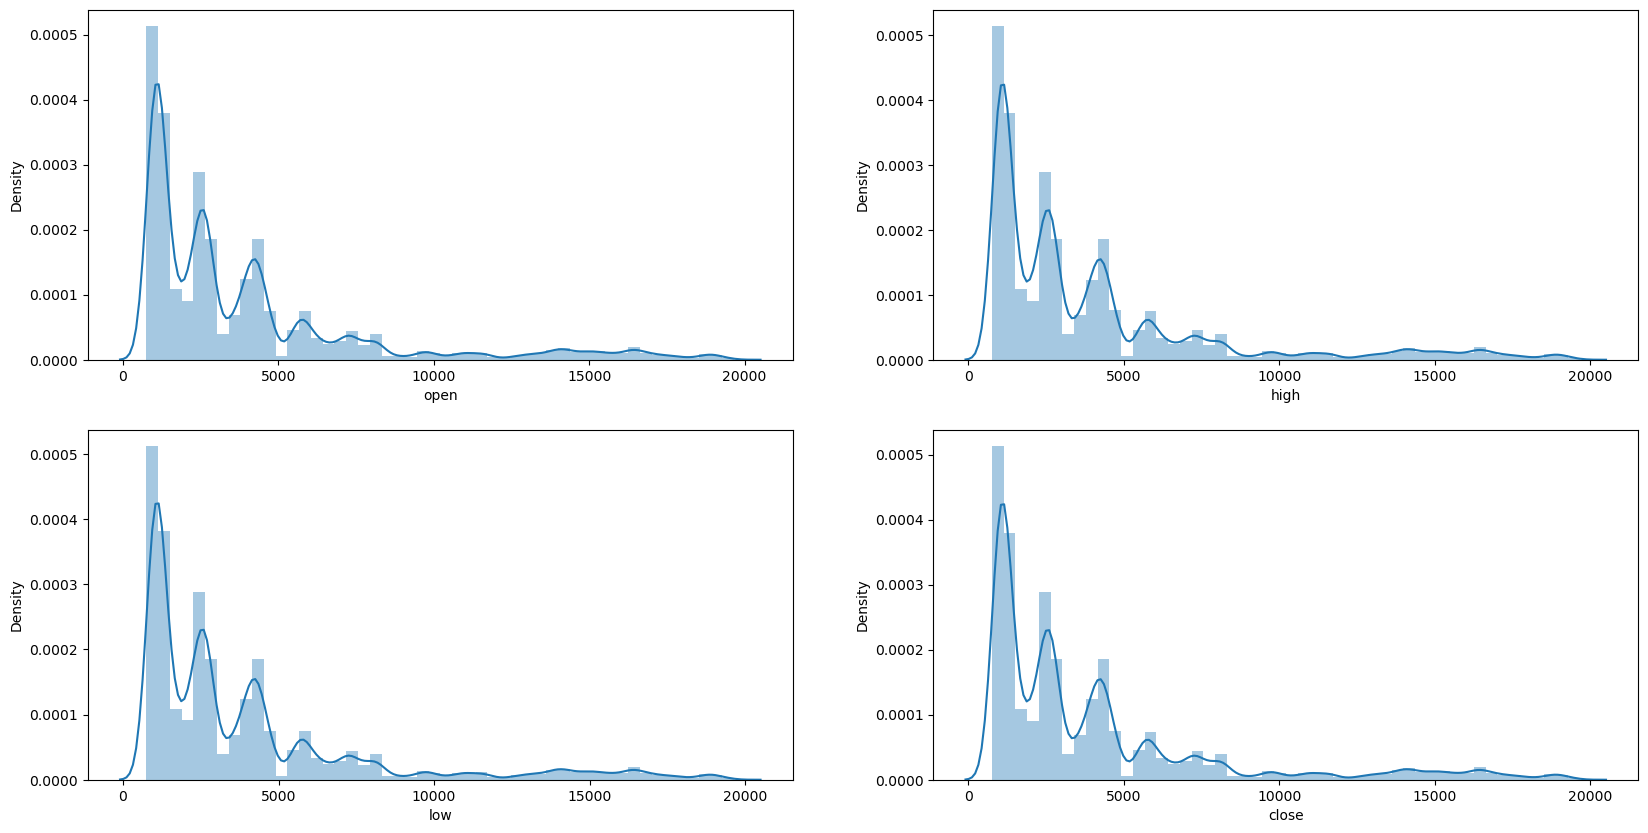

In [7]:
# Defining the features to visualize
features = ['open', 'high', 'low', 'close']

# Plotting distributions of features
plt.figure(figsize=(20, 10))
for i, col in enumerate(features):
    plt.subplot(2, 2, i+1)
    sb.distplot(df[col])
plt.show()


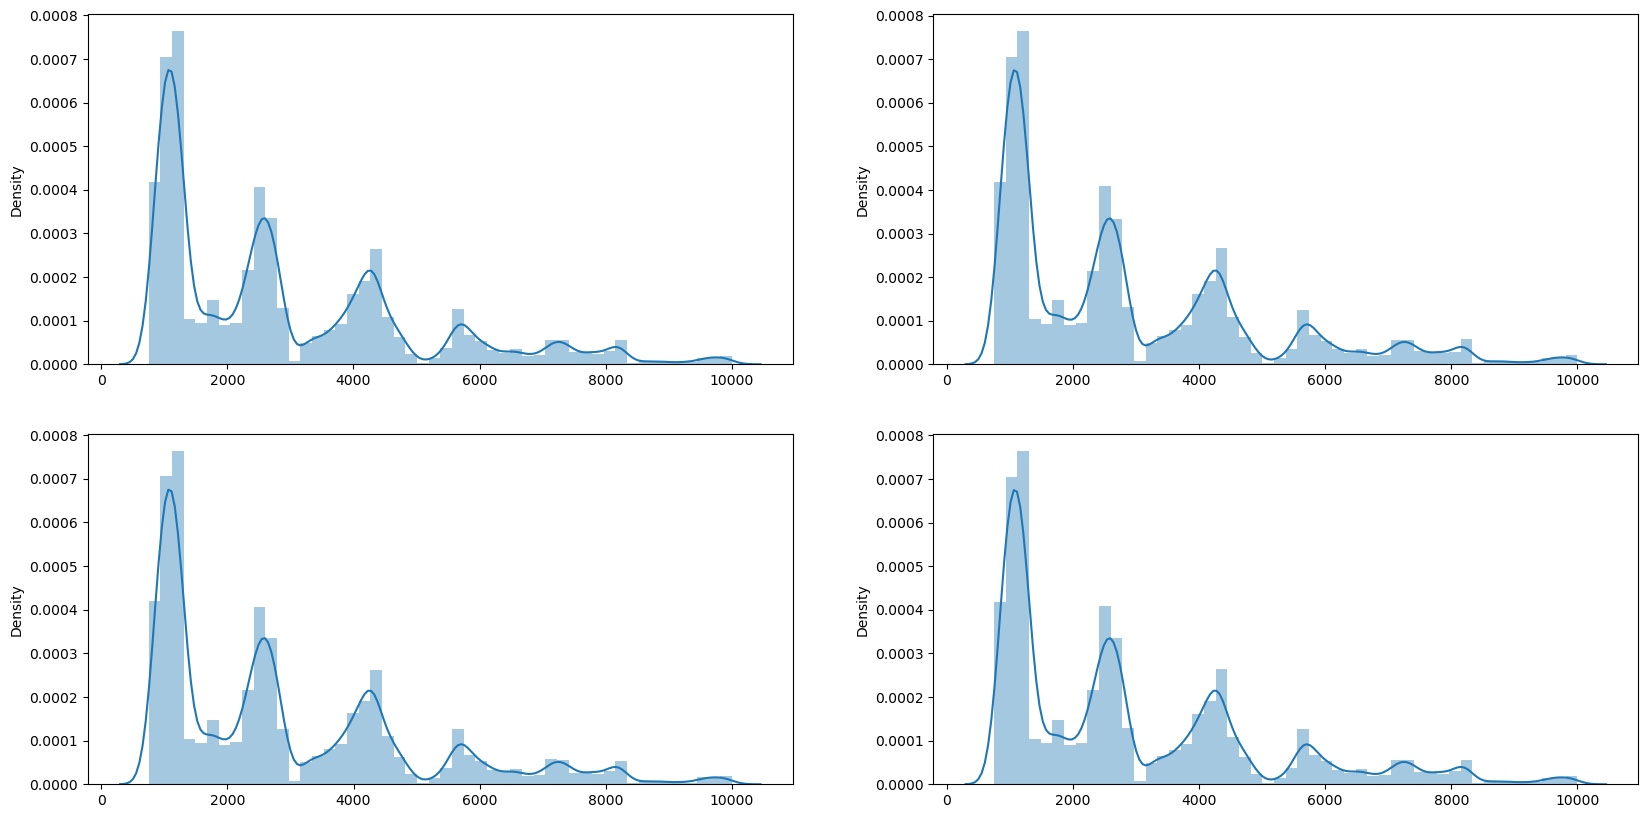

In [9]:
# Plotting distributions of features with a filtered range
plt.figure(figsize=(20, 10))
for i, col in enumerate(features):
    range_min = 0.0
    range_max = 10000.0
    filtered_data = [x for x in df[col] if range_min <= x <= range_max]
    plt.subplot(2, 2, i+1)
    sb.distplot(filtered_data)
plt.show()


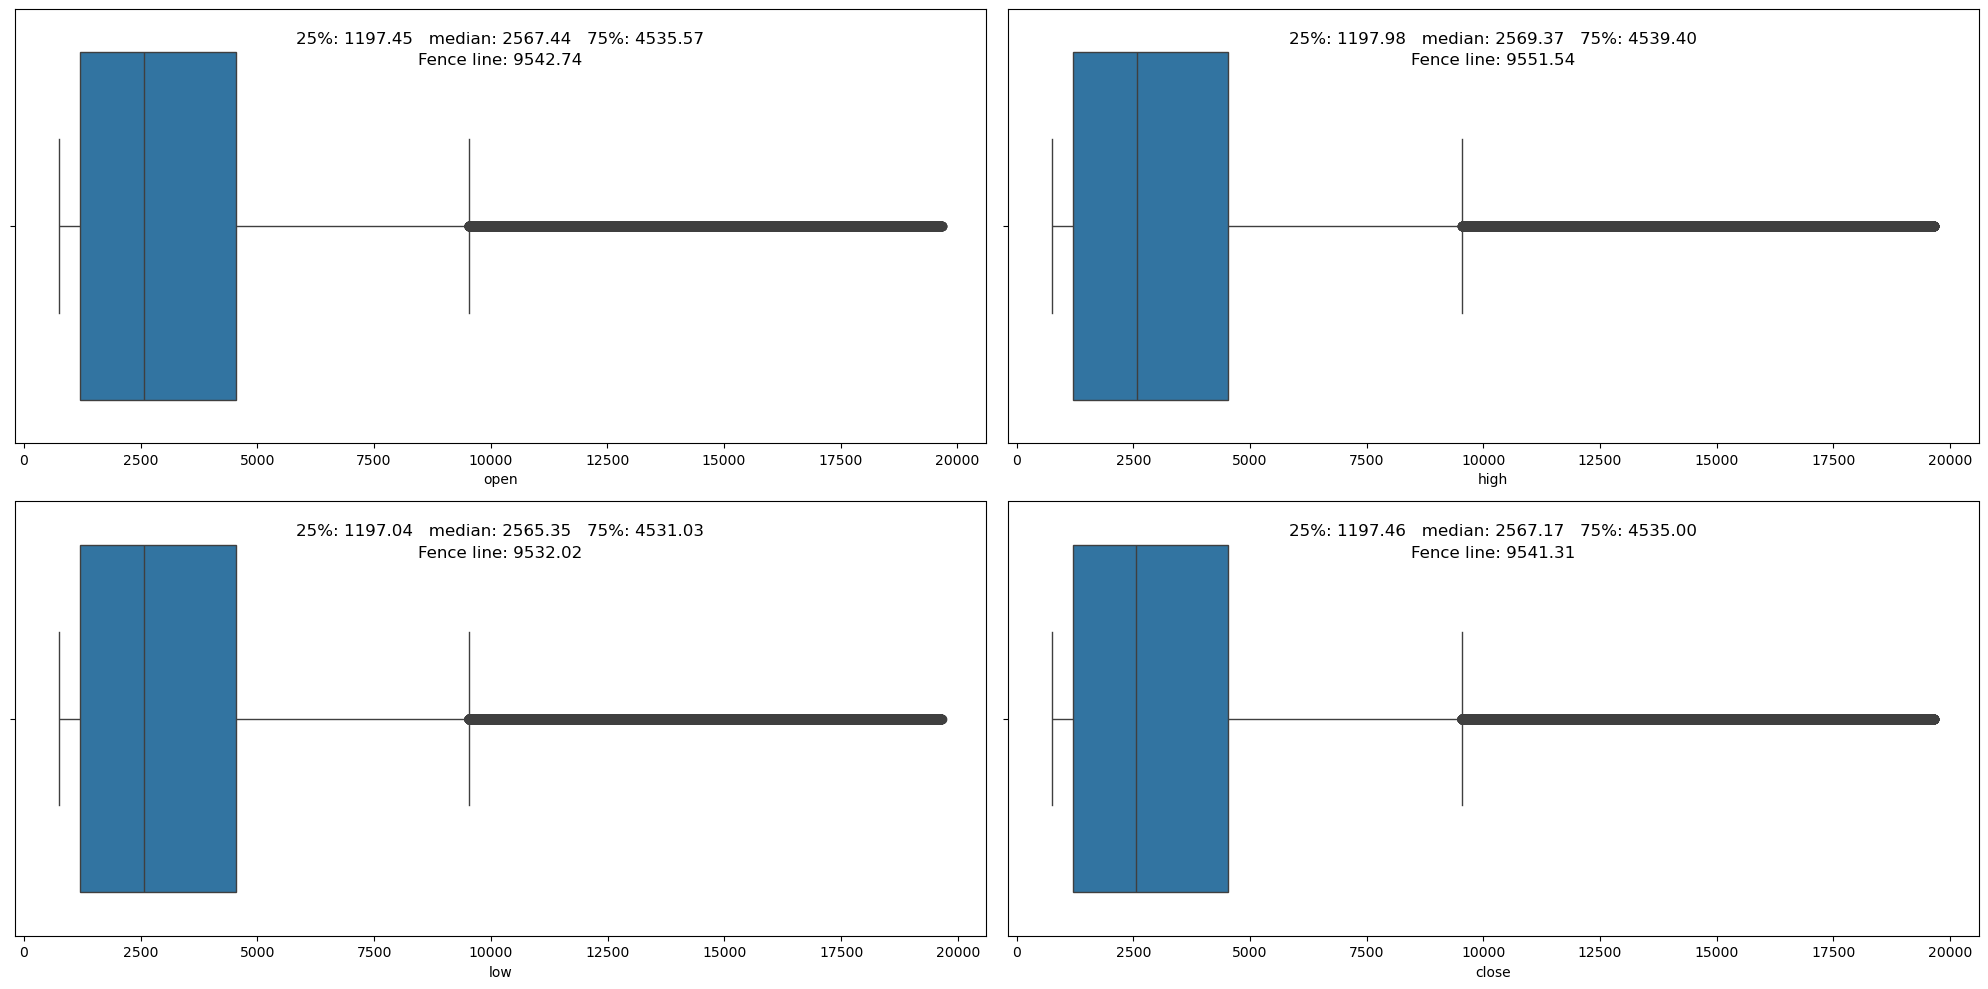

In [11]:
# Plotting boxplots of features
plt.figure(figsize=(20, 10))
for i, col in enumerate(features):
    plt.subplot(2, 2, i+1)
    sb.boxplot(x=df[col])
    q1, median, q3 = df[col].quantile([0.25, 0.5, 0.75])
    label_text = f"25%: {q1:.2f}   median: {median:.2f}   75%: {q3:.2f}"
    plt.text(0.5, 0.95, label_text, ha='center', va='top', transform=plt.gca().transAxes, fontsize=12)
    IQR = q3 - q1
    k = 1.5  # Adjust this value if needed
    lower_fence = q1 - k * IQR
    upper_fence = q3 + k * IQR
    label_fence = f"Fence line: {upper_fence:.2f}"
    plt.text(0.5, 0.90, label_fence, ha='center', va='top', transform=plt.gca().transAxes, fontsize=12)
    plt.xlabel(col)
plt.tight_layout()
plt.show()


In [13]:
# Splitting the date column and handling time separately
df['date'] = pd.to_datetime(df['date'])
df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month
df['day'] = df['date'].dt.day
print(df.head())


         unix                date   symbol      open      high       low  \
0  1514764740 2017-12-31 23:59:00  BTC/USD  13913.28  13913.28  13867.18   
1  1514764680 2017-12-31 23:58:00  BTC/USD  13913.26  13953.83  13884.69   
2  1514764620 2017-12-31 23:57:00  BTC/USD  13908.73  13913.26  13874.99   
3  1514764560 2017-12-31 23:56:00  BTC/USD  13827.00  13908.69  13827.00   
4  1514764500 2017-12-31 23:55:00  BTC/USD  13825.05  13825.05  13825.05   

      close  Volume BTC    Volume USD  year  month  day  
0  13880.00    0.591748   8213.456549  2017     12   31  
1  13953.77    1.398784  19518.309658  2017     12   31  
2  13913.26    0.775012  10782.944294  2017     12   31  
3  13859.58    0.666459   9236.841134  2017     12   31  
4  13825.05    0.065501    905.560130  2017     12   31  
